In [22]:
import pandas as pd
import numpy as np
from scipy import stats

# Criando um DataFrame a partir dos dados
df = pd.read_csv("cache-references.csv")

# Calculando a média e o intervalo de confiança (95%) para cada coluna
for column in df.columns:
    mean = df[column].mean()
    confidence_interval = stats.t.interval(0.95, len(df[column]) - 1, loc=mean, scale=stats.sem(df[column]))
    print(f'{column}:')
    print(f'  Média: {mean:.6f}')
    print(f'  Intervalo de Confiança (95%): {confidence_interval}')



semVetorizacao:
  Média: 407.954900
  Intervalo de Confiança (95%): (300.83850408697424, 515.0712959130259)
comVetorizacaoCompilador:
  Média: 142.426000
  Intervalo de Confiança (95%): (139.51798619863098, 145.334013801369)
comVetorizacaoProgramador:
  Média: 140.586100
  Intervalo de Confiança (95%): (137.1638710340056, 144.00832896599437)


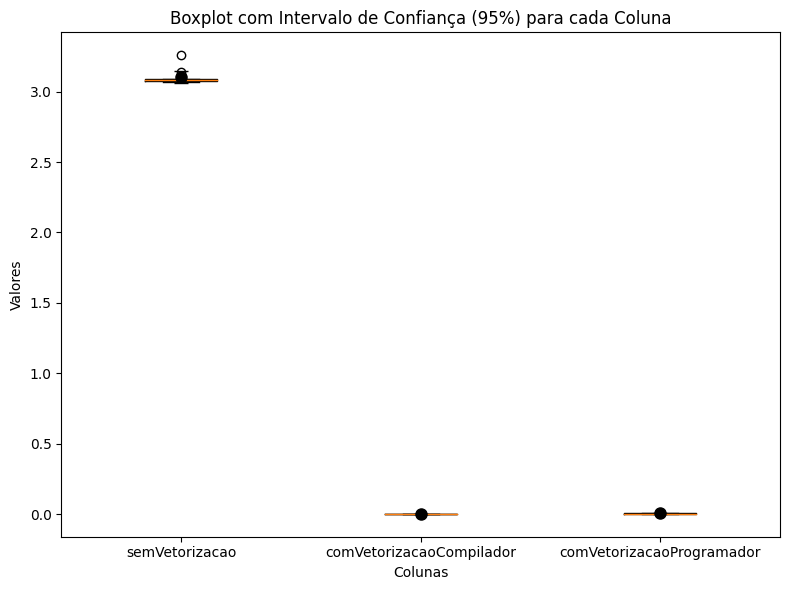

In [25]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Criando um DataFrame a partir dos dados
df = pd.read_csv("tempo.csv")

# Calcular a média e o intervalo de confiança (95%) para cada coluna
means = []
confidence_intervals = []

for column in df.columns:
    mean = df[column].mean()
    confidence_interval = stats.t.interval(0.95, len(df[column]) - 1, loc=mean, scale=stats.sem(df[column]))
    means.append(mean)
    confidence_intervals.append(confidence_interval)

# Convertendo as listas em arrays numpy
means = np.array(means)
confidence_intervals = np.array(confidence_intervals)

# Plotar o boxplot com os intervalos de confiança
plt.figure(figsize=(8, 6))
plt.boxplot(df.values, labels=df.columns)
plt.errorbar(range(1, len(means) + 1), means, yerr=(means - confidence_intervals[:, 0], confidence_intervals[:, 1] - means),
             fmt='o', color='black', linewidth=2, markersize=8, capsize=5)
plt.xlabel('Colunas')
plt.ylabel('Valores')
plt.title('Boxplot com Intervalo de Confiança (95%) para cada Coluna')
plt.tight_layout()
plt.show()
